# Differential Evolution

In this section, Differential Evolution (DE) algorithm is demonstrated. DE is a population-based stochastic optimization algorithm which updates population members by randomly mixing them, refer lecture notes for more details. It was proposed by Storn and Price in 1997. [Jones function](intro:jones-function) will be used to demonstrate the method. Following block imports all required packages:

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from pymoo.core.problem import Problem
from pymoo.algorithms.soo.nonconvex.de import DE
from pymoo.operators.sampling.lhs import LHS
from pymoo.termination.default import DefaultSingleObjectiveTermination
from pymoo.optimize import minimize
from pymoo.config import Config
Config.warnings['not_compiled'] = False

Below block of code defines required `problem` and `algorithm`. Refer pymoo's [DE](https://pymoo.org/algorithms/soo/de.html) documentation for more details.

> **_NOTE_**: Performance of DE is highly dependent on its parameters such as population size, mixing strategy, crossover constant (also known as recombination (CR)) and weighting factor (also known as mutation (F)). The value for these parameters is problem specific and needs to be tuned for each problem.

In [55]:
class JonesFunction(Problem):

    def __init__(self):
        super().__init__(n_var=2, n_obj=1, n_constr=0, xl=np.array([-2, -2]), xu=np.array([4, 4]))

    def _evaluate(self, x, out, *args, **kwargs):

        x1 = x[:, 0]
        x2 = x[:, 1]

        out["F"] = x1**4 + x2**4 - 4*x1**3 - 3*x2**3 + 2*x1**2 + 2*x1*x2

problem = JonesFunction()

pop_size = 10 * problem.n_var # Number of individuals in the population: 10 times number of variables
sampling = LHS() # How the initial population is sampled

algorithm = DE(pop_size=pop_size, sampling=sampling, variant="DE/best/1/bin",
                CR=0.8, dither="vector")

Below block of code defines termination criteria and performs optimization:

In [56]:
termination = DefaultSingleObjectiveTermination(
    xtol=1e-3,
    cvtol=1e-3,
    ftol=1e-3,
    period=10,
    n_max_gen=1000,
    n_max_evals=100000
)

res = minimize(problem, algorithm, termination=termination, verbose=True, 
               save_history=True, seed=1)

print("Best solution found: \nX = %s\nF = %s" % (res.X, res.F))

n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       20 |  8.8544083363 | -1.112498E+01
     2 |       40 | -9.637687E-03 | -1.112498E+01
     3 |       60 | -5.988233E+00 | -1.341694E+01
     4 |       80 | -9.289247E+00 | -1.349074E+01
     5 |      100 | -1.029149E+01 | -1.349074E+01
     6 |      120 | -1.216124E+01 | -1.349074E+01
     7 |      140 | -1.275452E+01 | -1.349823E+01
     8 |      160 | -1.327816E+01 | -1.349823E+01
     9 |      180 | -1.342216E+01 | -1.352723E+01
    10 |      200 | -1.349209E+01 | -1.353167E+01
    11 |      220 | -1.351119E+01 | -1.353167E+01
    12 |      240 | -1.352486E+01 | -1.353167E+01
    13 |      260 | -1.353033E+01 | -1.353192E+01
    14 |      280 | -1.353130E+01 | -1.353200E+01
    15 |      300 | -1.353145E+01 | -1.353203E+01
    16 |      320 | -1.353182E+01 | -1.353203E+01
    17 |      340 | -1.353193E+01 | -1.353203E+01
    18 |      360 | -1.353200E+01 | -1.353203E+01
    19 |      380 | -1.353202E+01 | -1.353203E+01


DE is able to get to the global optimum. You can change the termination criteria or DE settings (such as CR or F) to see how the algorithm’s performance changes. The minimize function also returns an object of Result class which contains all the information about optimization, refer pymoo’s [result](https://pymoo.org/interface/result.html) documentation to see what all information is available.

Below block uses `res` to visualize the location and velocity of particles as optimization progresses:

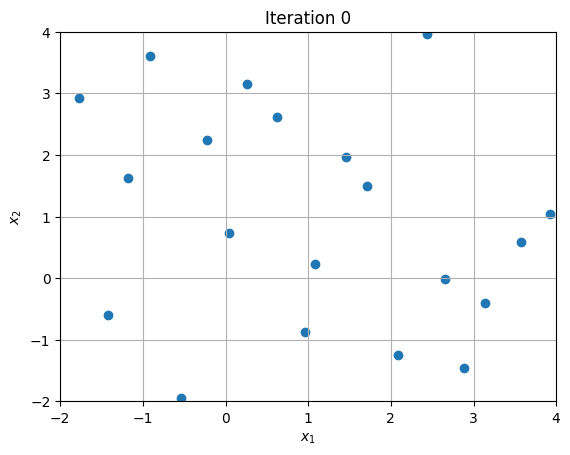

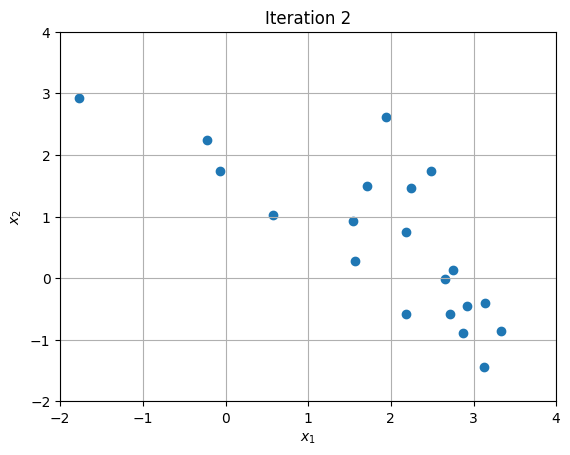

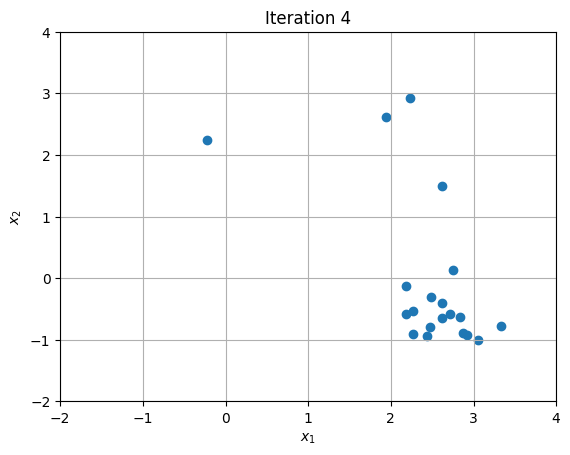

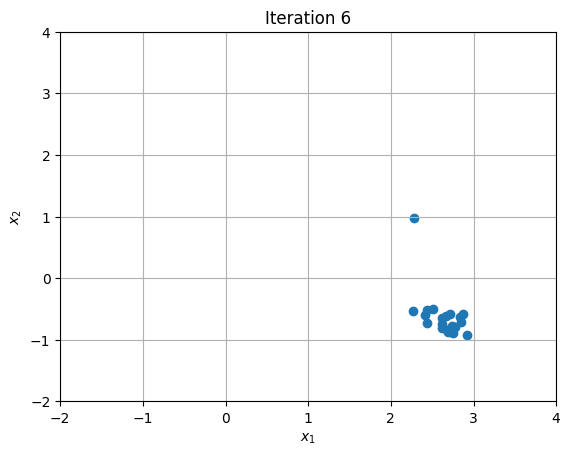

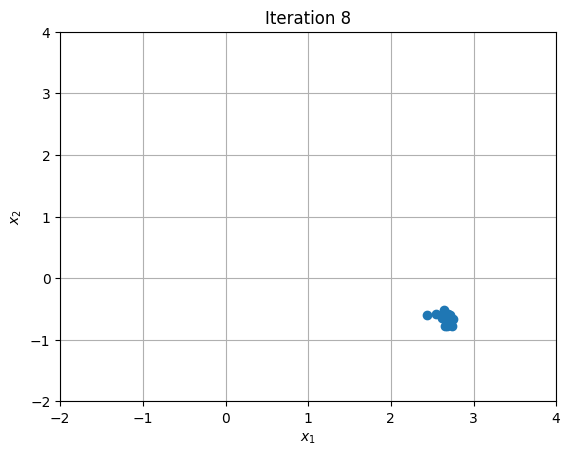

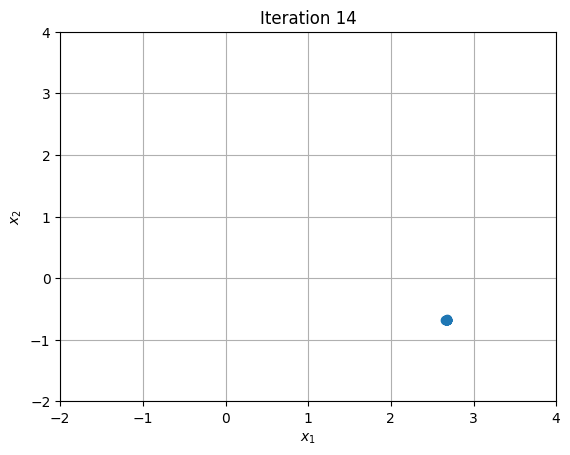

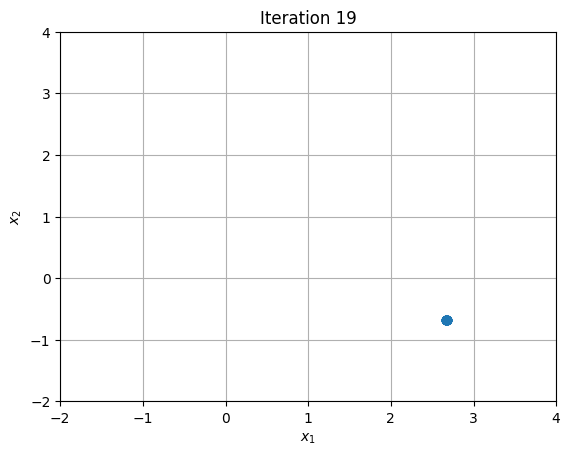

In [50]:
niter = len(res.history) # Number of iterations
iterations = np.linspace(0, 8, 5, dtype=np.int32) # Array of iterations
iterations = np.concatenate(( iterations, np.array([14, niter-1]) )) # Adding the last iteration

# Plotting the particle evolution
for itr in iterations:
    fig, ax = plt.subplots()
    ax.scatter(res.history[itr].pop.get("X")[:, 0], res.history[itr].pop.get("X")[:, 1])
    ax.set_title("Iteration %s" % itr)
    ax.grid()
    ax.set_xlim([-2, 4])
    ax.set_ylim([-2, 4])
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")